# Outbreaks

Exploratory stuff to figure out how best to define "outbreak"


In [1]:
# init

from matplotlib import pyplot
import numpy as np
import pandas as pd
import pandas.io.sql as psql
import seaborn as sns

from covid19stats import *

conn = get_db_conn()

sns.set(style="darkgrid")

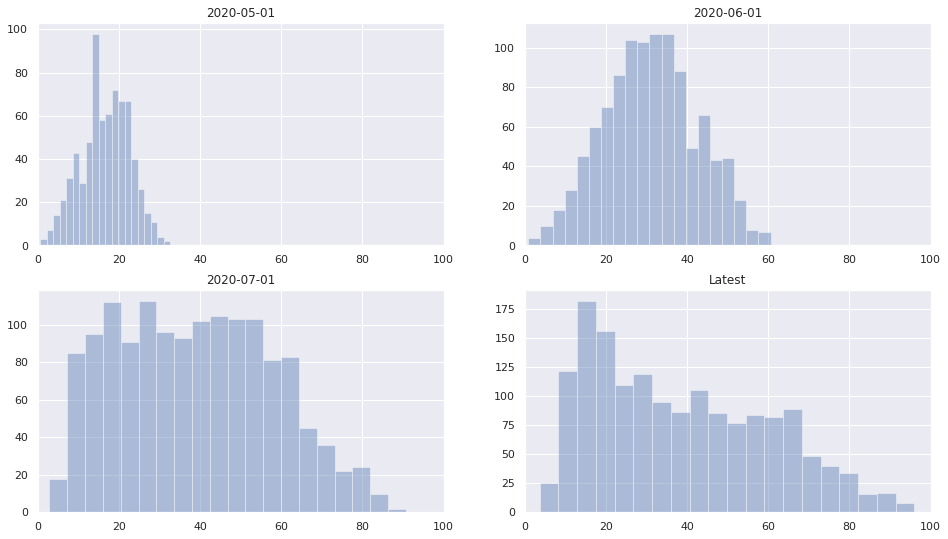

In [2]:
sql = """
select
    DoublingTimeDays
from fact_counties_progress
WHERE 
    date = '2020-05-01'
    and Confirmed >= 100;
"""

df_may = psql.read_sql(sql, conn)

sql = """
select
    DoublingTimeDays
from fact_counties_progress
WHERE 
    date = '2020-06-01'
    and Confirmed >= 100;
"""

df_jun = psql.read_sql(sql, conn)

sql = """
select
    DoublingTimeDays
from fact_counties_progress
WHERE 
    date = '2020-07-01'
    and Confirmed >= 100;
"""

df_jul = psql.read_sql(sql, conn)

sql = """
select
    DoublingTimeDays
from fact_counties_progress
WHERE
    date = (select max(date) from fact_counties_progress)
    and Confirmed >= 100;
"""

df_latest = psql.read_sql(sql, conn)

fig, ax = pyplot.subplots(2, 2, figsize=[16, 9])

s = sns.distplot(df_may, bins=20, ax=ax[0][0], kde=False)
s.set_title('2020-05-01')
s.set(xlim=(0,100))

s = sns.distplot(df_jun, bins=20, ax=ax[0][1], kde=False)
s.set_title('2020-06-01')
s.set(xlim=(0,100))

s = sns.distplot(df_jul, bins=20, ax=ax[1][0], kde=False)
s.set_title('2020-07-01')
s.set(xlim=(0,100))

s = sns.distplot(df_latest, bins=20, ax=ax[1][1], kde=False)
s.set_title('Latest')
s.set(xlim=(0,100));

In [3]:
# What's the distribution of Confirmed cases?

sql = """
select
    CASE
        WHEN Confirmed IS NULL OR Confirmed = 0 THEN 0
        WHEN Confirmed <= 100 THEN 100
        WHEN Confirmed <= 200 THEN 200
        WHEN Confirmed <= 300 THEN 300
        WHEN Confirmed <= 400 THEN 400
        WHEN Confirmed <= 500 THEN 500
        WHEN Confirmed <= 600 THEN 600
        WHEN Confirmed <= 700 THEN 700
        WHEN Confirmed <= 800 THEN 800
        WHEN Confirmed <= 900 THEN 900
        WHEN Confirmed <= 1000 THEN 1000
        WHEN Confirmed <= 5000 THEN 5000
        WHEN Confirmed <= 10000 THEN 10000
        ELSE 100000
    END
    AS UpperLimit
    ,Confirmed
    ,1 as Testo
from fact_counties_progress
WHERE 
    Date = (select max(Date) from fact_counties_progress)
    and TwoWeekAvg7DayConfirmedIncreasePct > 1.0
"""

df = psql.read_sql(sql, conn)

# show counts using our custom field, to sanity check the distplot
df.groupby('UpperLimit').UpperLimit.value_counts()

UpperLimit  UpperLimit
100         100           355
200         200           183
300         300            80
400         400            48
500         500            45
600         600            32
700         700            28
800         800             9
900         900            15
1000        1000           10
5000        5000           87
10000       10000          11
100000      100000          7
Name: UpperLimit, dtype: int64

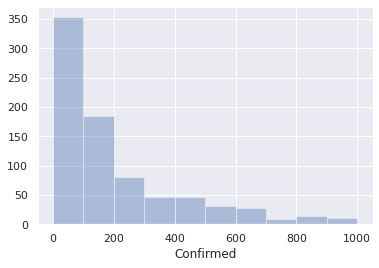

In [4]:
# this should match counts above

s = sns.distplot(
    df['Confirmed'],\
    bins=[0, 100,200,300,400,500,600,700,800,900,1000],\
    kde=False)